In [2]:
import sys
sys.path.insert(0, r'../../../quetzal')

from quetzal.io import  importer
from quetzal.model import stepmodel

%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd

In [3]:
training_folder = '../../'
input_folder = training_folder + r'/inputs/'

# rail

In [4]:
lines = gpd.read_file(input_folder+'sandbox/sandbox.geojson').set_index('id')
lines['geometry'] = lines['geometry'].apply(lambda g: g[0])

In [5]:
plt.rcParams['figure.figsize'] =[16, 9]

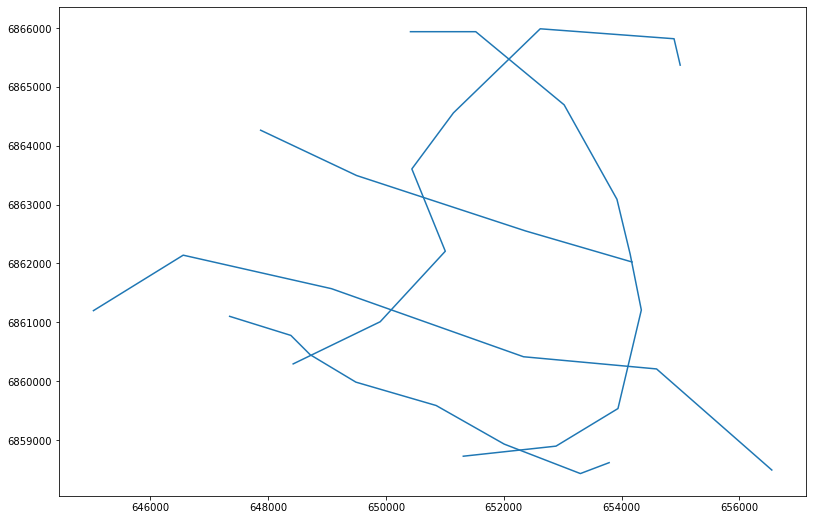

In [15]:
lines.plot()

In [7]:
links, nodes = importer.from_lines(lines, add_return=False)

In [8]:
links['route_type'] = 1
links['route_color'] = "#D22328" # rouge systra
links['time'] = 150
sm = stepmodel.StepModel(epsg=2154, coordinates_unit='meter')
sm.links, sm.nodes = links, nodes

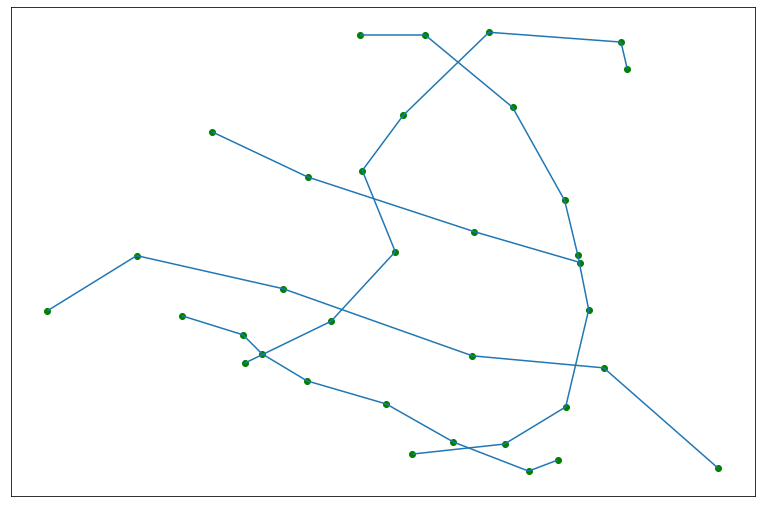

In [16]:
ax = sm.plot('links')
sm.plot('nodes', ax=ax, color='green')

In [17]:
sm.integrity_fix_collision()

In [18]:
sm.to_zip(training_folder + r'model/preparation/sandbox.zip')

to_hdf(new file): 100%|████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 22.81it/s]
